In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 

# Problem Statement

A retail company “ABC Private Limited” wants to understand the **customer purchase behaviour** (specifically, **purchase amount**) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, **they want to build a model to predict the purchase amount of customer against various products** which will help them to create personalized offer for customers against different products.

### Importing the datasets

In [2]:
paths: list[str] = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".csv"):
            paths.append(os.path.join(dirname, filename))

paths

['/kaggle/input/black-friday/train.csv', '/kaggle/input/black-friday/test.csv']

In [3]:
df_train = pd.read_csv(paths[0])
df_test = pd.read_csv(paths[1])

## Preprocessing and Cleaning

### Training dataset

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Testing dataset

In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


### Merging the _training_ and _testing_ data

In [8]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


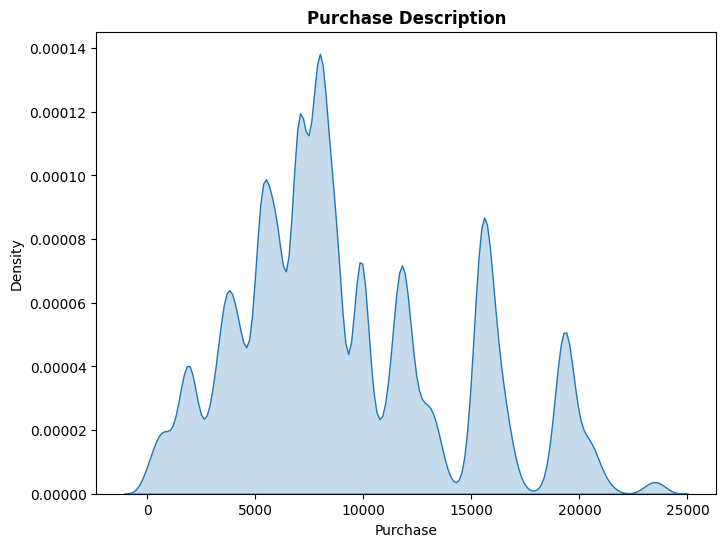

In [10]:
plt.figure(figsize=(8, 6))

sns.kdeplot(x='Purchase', data=df, fill=True)

plt.title("Purchase Description", fontweight="bold")

plt.show()

### Interpreting the description from `df.info()`

- The `Purchase` data is quite **spread out**, with values ranging from 12 to 23,961.
- The **majority** of purchases (50%) are **less than or equal to 8,047**, indicating that **most purchase amounts are relatively lower compared to the `max` value.**
- The upper quartile (75%) is at 12,054, showing that **the top 25% of purchase amounts are significantly higher than the `median`**, suggesting that there are some relatively high purchase amounts that **pull the mean upwards.**
- The mean (9,263.97) is higher than the median (8,047), which typically indicates a **right-skewed distribution**, where a few high values are affecting the average.

### Dropping the `User_ID` column

In [11]:
df.drop(columns=['User_ID'], inplace=True)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Handling categorical variables

In [12]:
cat_feats = []

for col in df.columns:
    if df[col].dtype == "object":
        cat_feats.append(col)

df[cat_feats].dtypes

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

#### `Gender`
- `F` mapped to **0**
- `M` mapped to **1**

In [13]:
df['Gender'] = df['Gender'].map({"F": 0, "M": 1})

df['Gender'].value_counts()

Gender
1    590031
0    193636
Name: count, dtype: int64

#### `City_Category`
Obtaining dummy variable encodings:
- `City A` : **0 0**
- `City B` : **1 0**
- `City C` : **0 1**

In [14]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True).astype(int)
df_city.rename(columns={'B': "City_Dummy_1", 'C': "City_Dummy_2"}, inplace=True)

df_city.head()

,City_Dummy_1,City_Dummy_2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [15]:
df = df.drop(columns=['City_Category'])
df = pd.concat([df, df_city], axis=1)

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Dummy_1,City_Dummy_2
0,P00069042,0,0-17,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0-17,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0-17,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0-17,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,55+,16,4+,0,8,NaN,NaN,7969.0,0,1


#### `Age`

In [16]:
df['Age'].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [17]:
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

df['Age'].value_counts()

Age
3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: count, dtype: int64

#### `Stay_In_Current_City_Years`

In [18]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

df['Stay_In_Current_City_Years'].head()

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  City_Dummy_1                783667 non-null  int64  
 11  City_Dummy_2                783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB
